# Predict corona cases

In [1]:
#!pip install convoys
import convoys
import pandas as pd
import requests
import io
import cloudpickle as cp
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [18]:
max_cases = 60000

In [19]:
df = pd.read_csv(io.StringIO(requests.get("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv").content.decode('utf-8')))
df = df[df["Country/Region"] == "Switzerland"].T.iloc[4:].reset_index()
df.columns = ["ds", "y"]
df["ds"] = pd.to_datetime(df["ds"],infer_datetime_format=True).dt.date
df["cap"] = max_cases
df = df[df["y"]>0]
df.reset_index(drop=True)
df.head()

,ds,y,cap
34,2020-02-25,1,60000
35,2020-02-26,1,60000
36,2020-02-27,8,60000
37,2020-02-28,8,60000
38,2020-02-29,18,60000


In [22]:
m = Prophet(mcmc_samples=500,seasonality_mode='multiplicative',growth='logistic').fit(df);
future = m.make_future_dataframe(periods=periods,freq='d')
future["cap"] = max_cases #whats the max RW we can reach
forecast = m.predict(future)
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


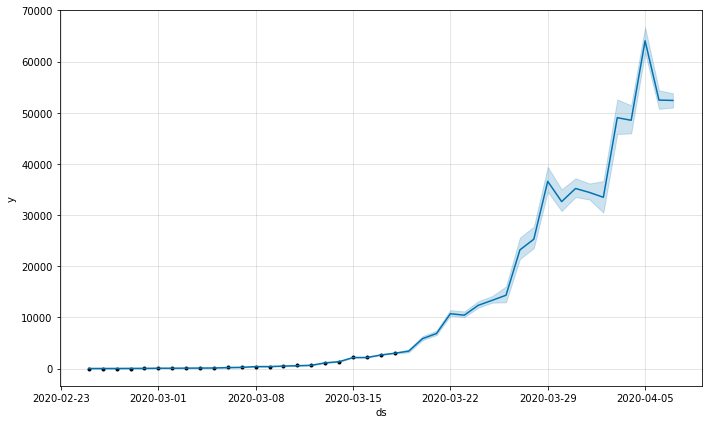

In [23]:
fig1 = m.plot(forecast)